# Client Churn Prediction
### CRISP-DM Cycle 4
---
The Top Bank company operates in Europe with a bank account as the main product, this product can keep client's salary and make payments. This account doesn't have any cost in the first 12 months, however, after that time trial, the client needs to rehire the bank for upcoming 12 months and redo this process every year. Recently the Analytics Team noticed that the churn rate is increasing.

As a Data Science Consultant, you need to create an action plan to decrease the number of churn customers and show the financial return on your solution.
At the end of your consultancy, you need to deliver to the TopBottom CEO a model in production, which will receive a customer base via API and return that same base with an extra column with the probability of each customer going into churn.
In addition, you will need to provide a report reporting your model's performance and the financial impact of your solution. Questions that the CEO and the Analytics team would like to see in their report:

1.  What is Top Bank's current Churn rate?
2.  How does the churn rate vary monthly?
3.  What is the performance of the model in classifying customers as churns
4.  What is the expected return, in terms of revenue, if the company uses its model to avoid churn from customers?

> Disclaimer: This is a fictional business case

## 0. Preparation

### 0.1 Imports & Settings

In [1]:
from IPython.core.display import HTML
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
import pickle
from src.utils_ml import metrics_cv, highlight_max, threshold_tuning_plot

In [2]:
def jupyter_settings():
    """
    Plots pre settings.
    """

    %matplotlib inline
    plt.style.use("seaborn-v0_8-whitegrid")
    plt.rcParams["figure.figsize"] = [25, 12]
    plt.rcParams["font.size"] = 24
    display(HTML("<style>.container {width:100% !important;}</style>"))
    sns.set()


jupyter_settings()

seed = 42

### 0.3 Path

In [3]:
# found the main project folders
path = Path().resolve().parent
data_path = path / "data/processed"

### 0.4 Data

This dataset is available [here](https://www.kaggle.com/mervetorkan/churndataset).


**Data fields**

- **RowNumber**: the number of the columns
- **CustomerID**: unique identifier of clients
- **Surname**: client's last name
- **CreditScore**: clients credit score for the financial market
- **Geography**: the country of the client
- **Gender**: the gender of the client
- **Age**: the client's age
- **Tenure**: number of years the client is in the bank 
- **Balance**: the amount that the client has in their account 
- **NumOfProducts**: the number of products that the client bought 
- **HasCrCard**: if the client has a credit card 
- **IsActiveMember**: if the client is active (within the last 12 months) 
- **EstimateSalary**: estimate of annual salary of clients 
- **Exited**: if the client is a churn (*target variable*)

In [4]:
X_train = pd.read_parquet(data_path / "X_train_fs.parquet")
X_test = pd.read_parquet(data_path / "X_test_fs.parquet")
X_val = pd.read_parquet(data_path / "X_val_fs.parquet")
y_train = pd.read_pickle(data_path / "y_train.pkl")
y_test = pd.read_pickle(data_path / "y_test.pkl")
y_val = pd.read_pickle(data_path / "y_val.pkl")

## 5. Hyperparameter Fine Tuning

### 5.1 Bayesian Search

Bayesian Optimization provides a principled technique based on Bayes Theorem to direct a search of a global optimization problem that is efficient and effective. In this case, Optuna was used.

#### 5.1.1 Threshold 0.43

In [6]:
proportion = float(len(y_train[y_train == 0])) / len(y_train[y_train == 1])

In [7]:
# cb_study = optuna.create_study(direction = 'maximize')
#
# func = lambda trial: catboost_objective(trial, X_train, y_train, proportion, 0.43)
#
# cb_study.optimize(func, n_trials = 70, n_jobs = -1)
# cb_best_params = cb_study.best_params
#
# cb_best_params

In [8]:
# cb_study = optuna.create_study(direction = 'maximize')
#
# func = lambda trial: catboost_objective(trial, X_train, y_train, proportion, 0.43, selected_score = 'precision')
#
# cb_study.optimize(func, n_trials = 70, n_jobs = -1)
# cb_precision_best_params = cb_study.best_params
#
# cb_precision_best_params

In [9]:
# cb_study = optuna.create_study(direction = 'maximize')
#
# func = lambda trial: catboost_objective(trial, X_train, y_train, proportion, 0.43, selected_score = 'f1')
#
# cb_study.optimize(func, n_trials = 70, n_jobs = -1)
# cb_f1_best_params = cb_study.best_params
#
# cb_f1_best_params

#### 5.1.2 Threshold 0.47

In [10]:
# cb_study = optuna.create_study(direction = 'maximize')
#
# func = lambda trial: catboost_objective(trial, X_train, y_train, proportion, 0.47)
#
# cb_study.optimize(func, n_trials = 70, n_jobs = -1)
# cb_best_params = cb_study.best_params
#
# cb_best_params

In [11]:
# cb_study = optuna.create_study(direction = 'maximize')
#
# func = lambda trial: catboost_objective(trial, X_train, y_train, proportion, 0.47, selected_score = 'precision')
#
# cb_study.optimize(func, n_trials = 70, n_jobs = -1)
# cb_precision_best_params = cb_study.best_params
#
# cb_precision_best_params

In [12]:
# cb_study = optuna.create_study(direction = 'maximize')
#
# func = lambda trial: catboost_objective(trial, X_train, y_train, proportion, 0.47, selected_score = 'f1')
#
# cb_study.optimize(func, n_trials = 70, n_jobs = -1)
# cb_f1_best_params = cb_study.best_params
#
# cb_f1_best_params

#### 5.1.3 Threshold 0.5

In [13]:
# cb_study = optuna.create_study(direction = 'maximize')

# func = lambda trial: catboost_objective(trial, X_train, y_train, proportion, 0.5)

# cb_study.optimize(func, n_trials = 70, n_jobs = -1)
# cb_best_params = cb_study.best_params

# cb_best_params

In [14]:
# cb_study = optuna.create_study(direction = 'maximize')
#
# func = lambda trial: catboost_objective(trial, X_train, y_train, proportion, 0.5, selected_score = 'precision')
#
# cb_study.optimize(func, n_trials = 70, n_jobs = -1)
# cb_precision_best_params = cb_study.best_params
#
# cb_precision_best_params

In [15]:
# cb_study = optuna.create_study(direction = 'maximize')
#
# func = lambda trial: catboost_objective(trial, X_train, y_train, proportion, 0.5, selected_score = 'f1')
#
# cb_study.optimize(func, n_trials = 70, n_jobs = -1)
# cb_f1_best_params = cb_study.best_params
#
# cb_f1_best_params

In [16]:
catboost_base = [
    CatBoostClassifier(scale_pos_weight=proportion, random_state=seed, verbose=False)
]

catboost_hft_43 = [
    CatBoostClassifier(
        learning_rate=0.010732547330507854,
        depth=3,
        n_estimators=100,
        scale_pos_weight=proportion,
        random_state=seed,
        verbose=False,
    ),  # 0.43 Recall
    CatBoostClassifier(
        learning_rate=0.07790765187207421,
        depth=9,
        n_estimators=1500,
        scale_pos_weight=proportion,
        random_state=seed,
        verbose=False,
    ),  # 0.43 Precision
    CatBoostClassifier(
        learning_rate=0.04069330665047851,
        depth=9,
        n_estimators=400,
        scale_pos_weight=proportion,
        random_state=seed,
        verbose=False,
    ),  # 0.43 F1
]

catboost_hft_47 = [
    CatBoostClassifier(
        learning_rate=0.010195450583486167,
        depth=3,
        n_estimators=600,
        scale_pos_weight=proportion,
        random_state=seed,
        verbose=False,
    ),  # 0.47 Recall
    CatBoostClassifier(
        learning_rate=0.09556004903941957,
        depth=10,
        n_estimators=1200,
        scale_pos_weight=proportion,
        random_state=seed,
        verbose=False,
    ),  # 0.47 Precision
    CatBoostClassifier(
        learning_rate=0.07930597072928085,
        depth=7,
        n_estimators=300,
        scale_pos_weight=proportion,
        random_state=seed,
        verbose=False,
    ),  # 0.47 F1
]

catboost_hft_50 = [
    CatBoostClassifier(
        learning_rate=0.05632450741656245,
        depth=3,
        n_estimators=400,
        scale_pos_weight=proportion,
        random_state=seed,
        verbose=False,
    ),  # 0.5 Recall
    CatBoostClassifier(
        learning_rate=0.05971996849177379,
        depth=10,
        n_estimators=900,
        scale_pos_weight=proportion,
        random_state=seed,
        verbose=False,
    ),  # 0.5 Precision
    CatBoostClassifier(
        learning_rate=0.05644301052955968,
        depth=4,
        n_estimators=800,
        scale_pos_weight=proportion,
        random_state=seed,
        verbose=False,
    ),  # 0.5 F1
]

In [17]:
catboost_result_base = metrics_cv(
    catboost_base, X_train, y_train, threshold=0.50, verbose=False
)
catboost_result_43 = metrics_cv(
    catboost_hft_43, X_train, y_train, threshold=0.40, verbose=False
)
catboost_result_47 = metrics_cv(
    catboost_hft_43, X_train, y_train, threshold=0.43, verbose=False
)
catboost_result_50 = metrics_cv(
    catboost_hft_43, X_train, y_train, threshold=0.45, verbose=False
)

catboost_result = pd.concat(
    [catboost_result_base, catboost_result_43, catboost_result_47, catboost_result_50],
    axis=0,
).reset_index(drop=True)
catboost_result.style.apply(highlight_max)

Please wait a moment - Doing CV
Finished, check the results
Please wait a moment - Doing CV
Finished, check the results
Please wait a moment - Doing CV
Finished, check the results
Please wait a moment - Doing CV
Finished, check the results


,Model_Name,Threshold,Balanced_Accuracy Mean,Balanced_Accuracy STD,Precision Mean,Precision STD,Recall Mean,Recall STD,F1 Score Mean,F1 Score STD,ROCAUC Mean,ROCAUC STD
0,CatBoostClassifier,0.500000,0.774000,0.014000,0.556000,0.011000,0.689000,0.037000,0.615000,0.013000,0.774000,0.774000
1,CatBoostClassifier,0.400000,0.724000,0.009000,0.340000,0.011000,0.893000,0.018000,0.492000,0.010000,0.724000,0.724000
2,CatBoostClassifier,0.400000,0.734000,0.015000,0.476000,0.137000,0.737000,0.158000,0.544000,0.054000,0.734000,0.734000
3,CatBoostClassifier,0.400000,0.746000,0.022000,0.498000,0.116000,0.722000,0.131000,0.565000,0.053000,0.746000,0.746000
4,CatBoostClassifier,0.430000,0.738000,0.010000,0.367000,0.018000,0.854000,0.023000,0.513000,0.014000,0.738000,0.738000
5,CatBoostClassifier,0.430000,0.739000,0.011000,0.493000,0.128000,0.711000,0.145000,0.553000,0.043000,0.739000,0.739000
6,CatBoostClassifier,0.430000,0.748000,0.017000,0.515000,0.109000,0.698000,0.121000,0.572000,0.044000,0.748000,0.748000
7,CatBoostClassifier,0.450000,0.746000,0.007000,0.402000,0.017000,0.796000,0.031000,0.533000,0.010000,0.746000,0.746000
8,CatBoostClassifier,0.450000,0.742000,0.011000,0.514000,0.113000,0.678000,0.121000,0.562000,0.033000,0.742000,0.742000
9,CatBoostClassifier,0.450000,0.750000,0.016000,0.533000,0.096000,0.672000,0.100000,0.579000,0.036000,0.750000,0.750000


In [18]:
thresholds = [0.43, 0.47, 0.50]

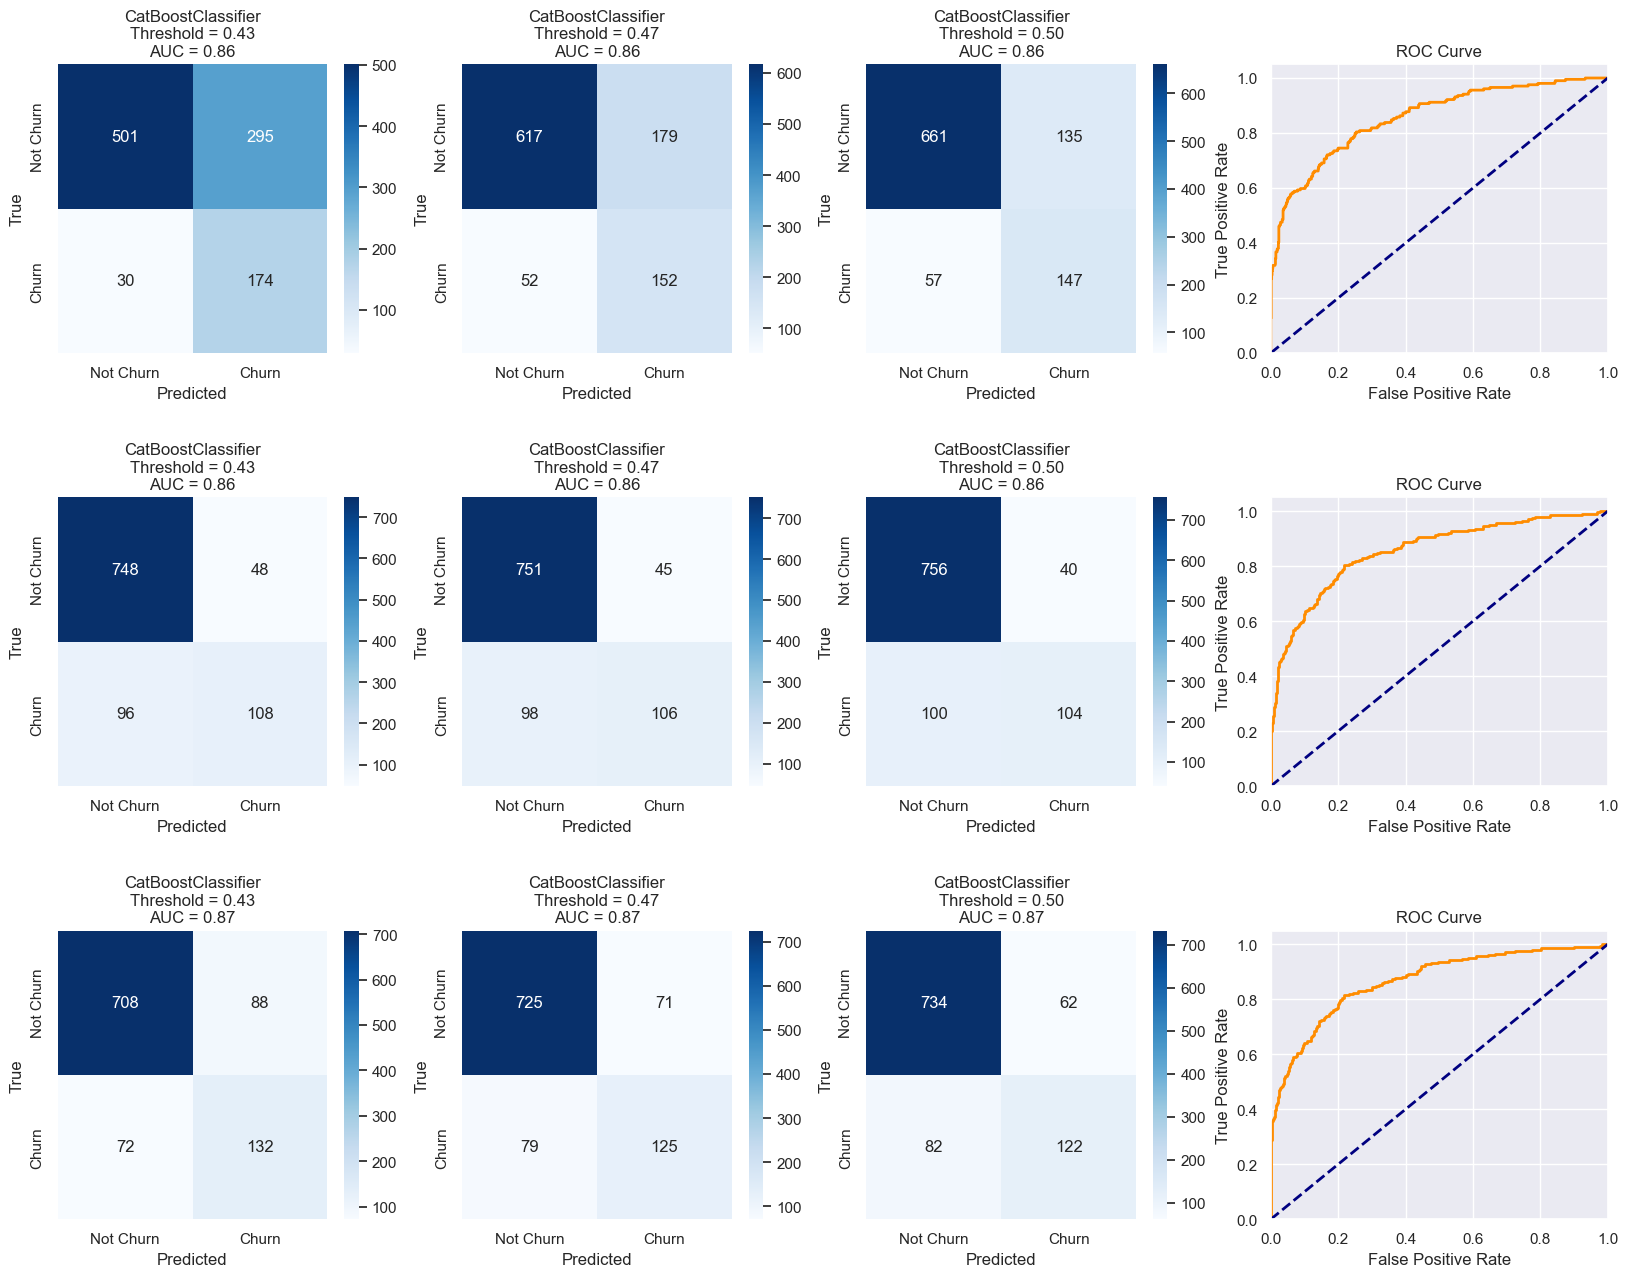

In [19]:
threshold_tuning_plot(catboost_hft_43, X_val, y_val, thresholds)

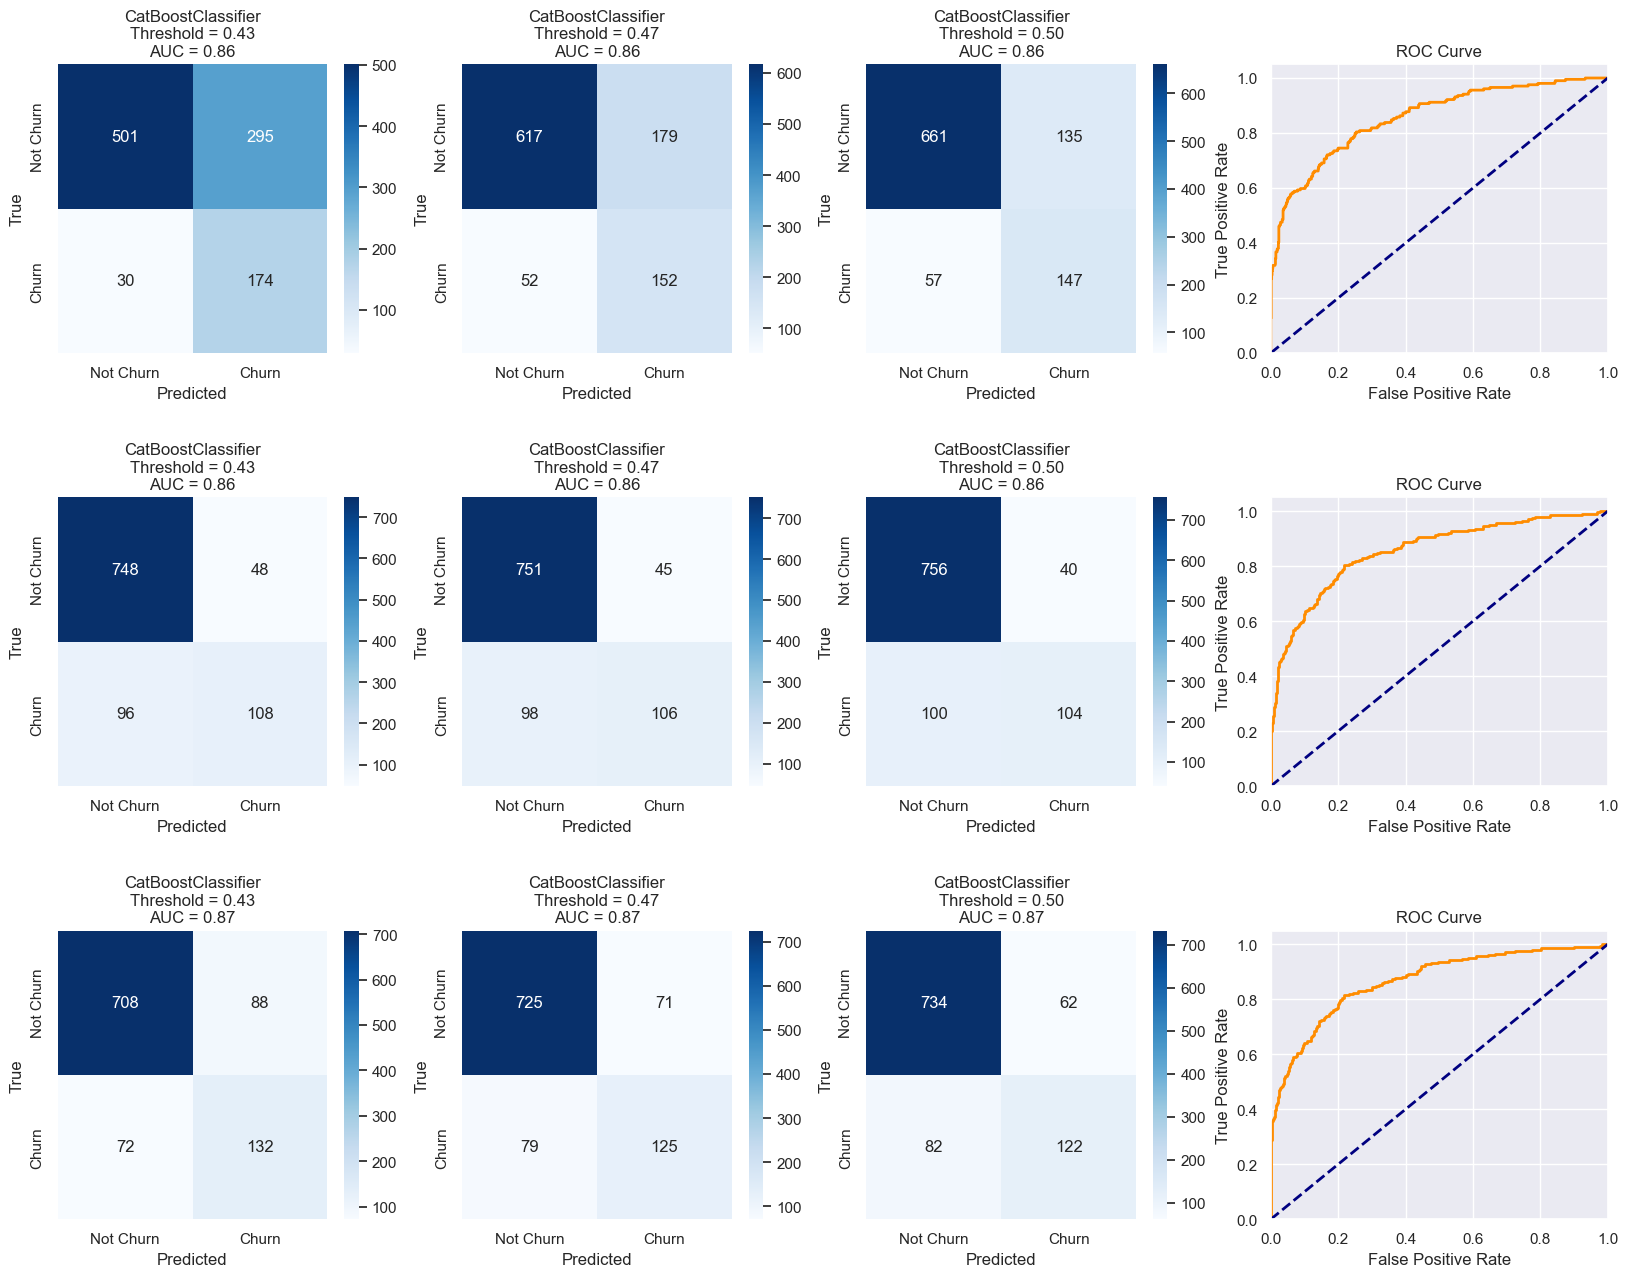

In [20]:
threshold_tuning_plot(catboost_hft_43, X_val, y_val, thresholds)

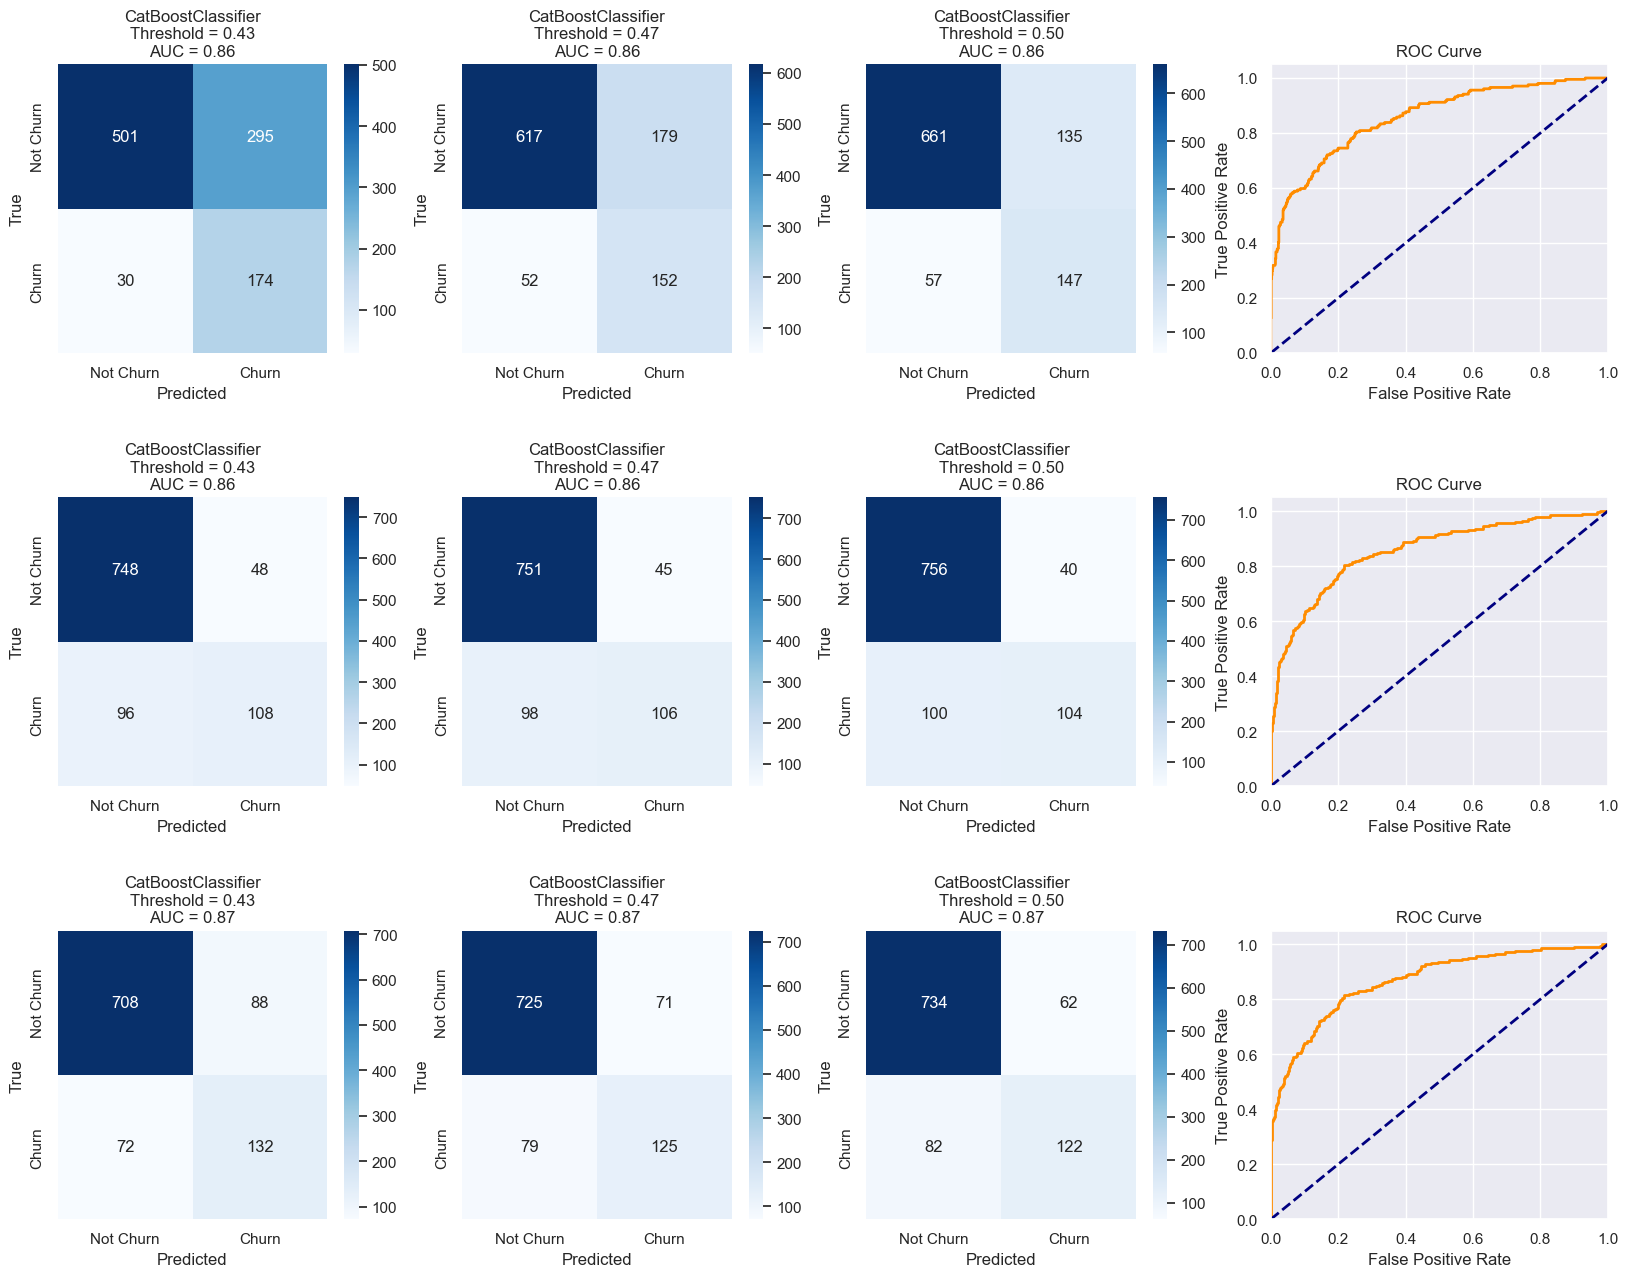

In [21]:
threshold_tuning_plot(catboost_hft_43, X_val, y_val, thresholds)

In [25]:
model_1 = CatBoostClassifier(
    learning_rate=0.010732547330507854,
    depth=3,
    n_estimators=100,
    scale_pos_weight=proportion,
    random_state=seed,
    verbose=False,
)

model_2 = CatBoostClassifier(
    learning_rate=0.010195450583486167,
    depth=3,
    n_estimators=600,
    scale_pos_weight=proportion,
    random_state=seed,
    verbose=False,
)

model_3 = CatBoostClassifier(
    learning_rate=0.05632450741656245,
    depth=3,
    n_estimators=400,
    scale_pos_weight=proportion,
    random_state=seed,
    verbose=False,
)

In [26]:
catboost_result_43 = metrics_cv(
    [model_1], X_train, y_train, threshold=0.43, verbose=False
)
catboost_result_47 = metrics_cv(
    [model_2], X_train, y_train, threshold=0.47, verbose=False
)
catboost_result_50 = metrics_cv(
    [model_3], X_train, y_train, threshold=0.50, verbose=False
)

catboost_result = pd.concat(
    [catboost_result_43, catboost_result_47, catboost_result_50], axis=0
).reset_index(drop=True)
catboost_result.style.apply(highlight_max)

Please wait a moment - Doing CV
Finished, check the results
Please wait a moment - Doing CV
Finished, check the results
Please wait a moment - Doing CV
Finished, check the results


,Model_Name,Threshold,Balanced_Accuracy Mean,Balanced_Accuracy STD,Precision Mean,Precision STD,Recall Mean,Recall STD,F1 Score Mean,F1 Score STD,ROCAUC Mean,ROCAUC STD
0,CatBoostClassifier,0.430000,0.738000,0.010000,0.367000,0.018000,0.854000,0.023000,0.513000,0.014000,0.738000,0.738000
1,CatBoostClassifier,0.470000,0.778000,0.011000,0.473000,0.014000,0.778000,0.031000,0.588000,0.012000,0.778000,0.778000
2,CatBoostClassifier,0.500000,0.781000,0.013000,0.515000,0.014000,0.741000,0.034000,0.607000,0.013000,0.781000,0.781000


Considering the recall, the best threshold is 0.85, but the best fit in this case is the threshold 0.47 with recall=0.78.

In [30]:
# Concatenate train and validation
X_data = pd.concat([X_train, X_val], axis=0)
y_data = pd.concat([y_train, y_val], axis=0)

# Save new data
X_data.to_parquet(data_path / "X_train_hft.parquet")
y_data.to_pickle(data_path / "y_train_hft.pkl")

# Model
model = CatBoostClassifier(
    learning_rate=0.010195450583486167,
    depth=3,
    n_estimators=600,
    scale_pos_weight=proportion,
    random_state=seed,
    verbose=False,
)
model.fit(X_data, y_data)

# Probability
yhat_proba = model.predict_proba(X_test)[:, 1]
threshold = 0.47
yhat = (yhat_proba >= threshold).astype(int)

# Saving model
model_path = path / "src/models"
model.save_model(str(model_path) + "/model.cbm")
with open(str(model_path) + "/model.pkl", "wb") as file:
    pickle.dump(model, file)

# Saving threshold
pickle.dump(threshold, open(str(model_path) + "/threshold.pkl", "wb"))